In [1068]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns

Dimensional Params

In [1069]:
k_on1 = 1e5
A_01 = 1e-8
k_on = k_on1*A_01
rho_T1 = 1e5
alpha = 3
k_off = 1e-4
q_on1 = 6.5e3
q_on = q_on1*A_01
q_off = 4.7e-3
rho_N1 = 2.2e5
beta = 5 

Dimensionless Params

In [1070]:
A_0 = (172635*A_01*1.85e-18)/1.66e-24
rho_T = rho_T1/beta
rho_N = rho_N1/alpha
n_1 = k_on*rho_T*(1/q_off)
n_2 = k_off/q_off
v = q_on*(1/q_off)*rho_N
delta = rho_T/rho_N
N_r0 = 0.8
T_r0 = 1

In [1071]:
A_0 

Model

In [1072]:
def model(t, z):

    dAdt = n_2*z[1] + (z[2]/delta) - v*(1 - z[2] - delta*z[3])*z[0] - n_1*(1 - z[1] - z[3])*z[0]
    dT_radt = n_1*(1 - z[1] - z[3])*z[0] + z[3] - n_2*z[1] - v*(1 - z[2] - delta*z[3])*z[1]
    dN_radt = delta*v*(1 - z[2] - delta*z[3])*z[0] + n_2*delta*z[3] - z[2] - n_1*(1 - z[1] - z[3])*z[2]
    dB_dt = (n_1/delta)*(1 - z[1] - z[3])*z[2] + v*(1 - z[2] - delta*z[3])*z[1] - (n_2 + 1)*z[3]
    dzdt = [dAdt, dT_radt, dN_radt, dB_dt]

    return dzdt

In [1073]:
z0 = [A_0/rho_T, T_r0, N_r0, 0]
t= np.geomspace(0.000000001, 1000000000, 500)
t_span = [0, 1000000000]

z = solve_ivp(model, t_span, z0, method ='Radau', t_eval = t)



KeyboardInterrupt: 

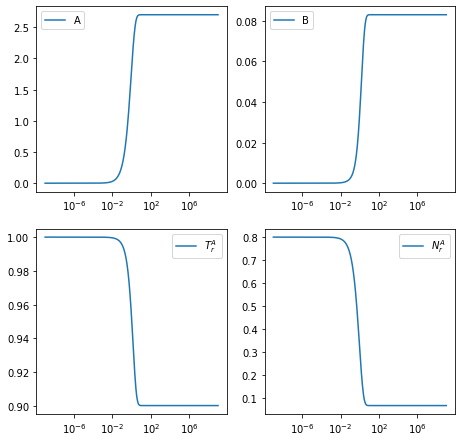

In [ ]:
A = z.y[0]
T_ra = z.y[1]
N_ra = z.y[2]
B = z.y[3]
fig, axs = plt.subplots(2, 2, figsize=(7.5, 7.5))

axs[0][0].semilogx(t, A, label = 'A')
axs[0][1].semilogx(t, B, label = 'B')
axs[1][0].semilogx(t, T_ra, label = r'$T_r^A$')
axs[1][1].semilogx(t, N_ra, label = r'$N_r^A$')
axs[0][0].legend(loc = 'best')
axs[0][1].legend(loc = 'best')
axs[1][0].legend(loc = 'best')
axs[1][1].legend(loc = 'best')


In [ ]:
N_array = np.linspace(0, 1, 20)
T_array = np.linspace(0, 1, 20)
B_array = np.zeros((20, 20))

for i in range(len(N_array)):
    for j in range(len(T_array)):

        # specify initial conditions
        z0 = [A_0/rho_T, T_array[i], N_array[i], 0]
        
        # calculate solution
        z = solve_ivp(model, t_span, z0, method ='Radau', t_eval = t)

        # extrcat B solution
        B = z.y[3]
        val = B[-1]
        B_array[i][j] = val
        

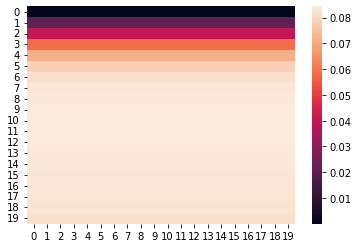

In [ ]:
ax = sns.heatmap(B_array)
plt.show()

In [ ]:
import sympy as sym

In [ ]:
A_0 = sym.Rational('0.192394427710843')
rho_T = sym.Rational('20000.0')
rho_N = sym.Rational('73333.3333333333')
n_1 = sym.Rational('0.425531914893617')
n_2 = sym.Rational('0.0212765957446809')
v = sym.Rational('0.101418439716312')
delta = sym.Rational('0.272727272727273')
N_r0 = sym.Rational('0.8')
T_r0 = sym.Rational('1.0')

In [ ]:
def equations(z):

    return [n_2*z[1] + (z[2]/delta) - v*(1 - z[2] - delta*z[3])*z[0] - n_1*(1 - z[1] - z[3])*z[0],
    n_1*(1 - z[1] - z[3])*z[0] + z[3] - n_2*z[1] - v*(1 - z[2] - delta*z[3])*z[1],
    delta*v*(1 - z[2] - delta*z[3])*z[0] + n_2*delta*z[3] - z[2] - n_1*(1 - z[1] - z[3])*z[2],
    (n_1/delta)*(1 - z[1] - z[3])*z[2] + v*(1 - z[2] - delta*z[3])*z[1] - (n_2 + 1)*z[3]]


In [ ]:
sym.init_printing()
A = sym.Symbol('A')
T = sym.Symbol('T')
N = sym.Symbol('N')
B = sym.Symbol('B')
A_st = sym.Eq(n_2*T + (N/delta) - v*(1 - N - delta*B)*A - n_1*(1 - T - B)*A, 0)
T_st = sym.Eq(n_1*(1 - T - B)*A + B - n_2*T - v*(1 - N - delta*B)*T, 0)
N_st = sym.Eq(delta*v*(1 - N - delta*B)*A + n_2*delta*B - N - n_1*(1 - T - B)*N, 0)
B_st = sym.Eq((n_1/delta)*(1 - T - B)*N + v*(1 - N - delta*B)*T - (n_2 + 1)*B, 0)
sol = sym.solve([A_st, T_st, N_st, B_st], dict=True)

KeyboardInterrupt: 

In [ ]:
print(sol)

[{B: (-8092705167173252117297596021*T*(4203582745909592277459977776860801149959140*T - sqrt(8483555192214455290578211471283233041647865481632555860928023211294026939183185000380481) + 78165082239323969523853617334834520747473441) + 39554989617664977200590950331211052859955490948731933947500000000000000*T - 7598784194528875000000000000*sqrt(8483555192214455290578211471283233041647865481632555860928023211294026939183185000380481) + 593959591484224662732519037755593043729426856065911570108875000000000000)/(1215805471124620*(27980097652460724434574027149836459703461689140005227087*T - 6250000000000*sqrt(8483555192214455290578211471283233041647865481632555860928023211294026939183185000380481) + 551585505184418699859996933050341738141046368750000000000)), A: (-60059568878680541824558813622551327102439952035877414419795665519701211456980068173672759726436305376088445572531*T**2 - 227751730638954263673215040045942521418484025096732198466644158443355086212354582095627330931725550379375000000000